In [ ]:
# Question: Multivariate Outlier Detection Using Mahalanobis Distance
# Description: Implement Mahalanobis distance to detect multivariate outliers in a dataset.



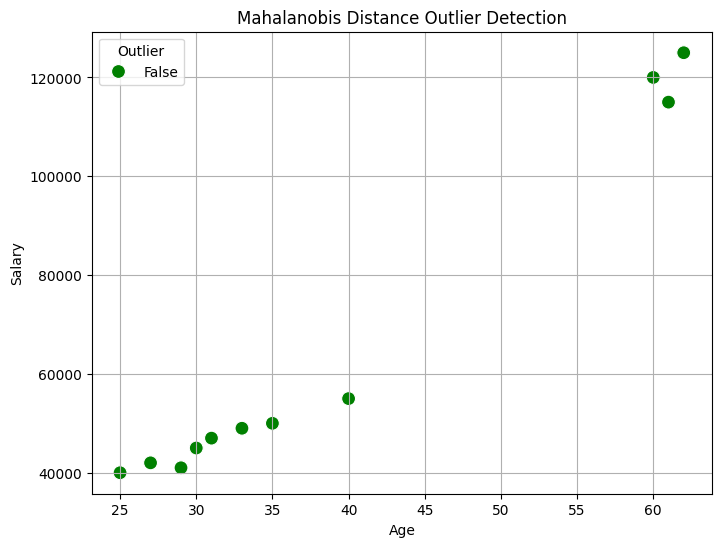


Detected Outliers:
Empty DataFrame
Columns: [Age, Salary, Mahalanobis, Outlier]
Index: []


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Age': [25, 27, 29, 30, 31, 33, 35, 40, 60, 61, 62],
    'Salary': [40000, 42000, 41000, 45000, 47000, 49000, 50000, 55000, 120000, 115000, 125000]
}
df = pd.DataFrame(data)

# Correct Mahalanobis distance function
def mahalanobis_distance(X):
    mean_vec = np.mean(X, axis=0)
    cov_matrix = np.cov(X, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    
    # Calculate difference from mean
    diff = X - mean_vec
    
    # Compute Mahalanobis distance for each observation
    md = []
    for i in range(diff.shape[0]):
        md_val = diff[i].T @ inv_cov_matrix @ diff[i]
        md.append(md_val)
    return np.array(md)

X = df[['Age', 'Salary']].values
df['Mahalanobis'] = mahalanobis_distance(X)

# Determine threshold from chi-square distribution (degrees of freedom = number of features)
threshold = chi2.ppf((1 - 0.01), df=X.shape[1])  # 99% confidence

# Flag outliers
df['Outlier'] = df['Mahalanobis'] > threshold

# Plot results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Outlier', palette={False: 'green', True: 'red'}, s=100)
plt.title("Mahalanobis Distance Outlier Detection")
plt.grid(True)
plt.show()

print("\nDetected Outliers:")
print(df[df['Outlier']])
